In [1]:
import sys
sys.path.append('../')
%load_ext autoreload
%autoreload 2
import pandas as pd
import pickle as pkl
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
from notebook_utils import *
from parameter_estimation import load_data_util
import numpy as np
import pandas as pd
import snap
import operator
from sklearn import metrics
import networkx as nx
import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='serif', size='15') # controls default text sizes
plt.rc('xtick', labelsize='15')
plt.rc('ytick', labelsize='15')
plt.rc('legend', fontsize='15') # legend fontsize
plt.rc('axes', labelsize='15', titlesize='15')  # fontsize of the x and y labels # fontsize of the axes title
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# Data load

In [2]:
df_f = pd.read_csv('UF_KWON.tsv', sep='\t', header=0, usecols=[0,1,2,3,4,5,6,7])
df_f.head()

,userid,followers,friends/followees,posts,u_t,u_f,features,casnames
0,39357,186,0,9393,55,0,"('clickbroke', '', False)",[]
1,41645179,2775,3057,27034,39,0,(),[]
2,51828921,23,18,52,7,0,"('webosfrance', 'Palm Pre, Palm Eos et Palm we...",[]
3,1688,227,0,3135,17,1,"('olouvRss', '', False)",['R_Ipod64.txt']
4,41625921,672,280,8200,3,45,(),"['R_swineZombie.txt', 'R_SwinePork.txt']"


In [3]:
df_t = pd.read_csv('UT_KWON.tsv', sep='\t', header=0, usecols=[0,1,2,3,4,5])
df_t.head()

,userid,followers,friends/followees,posts,u_t,u_f
0,41645179,2775,3057,27034,39,0
1,51828921,23,18,52,7,0
2,53471447,339,496,1093,7,0
3,46161420,3,20,27967,15,0
4,54888609,974,1512,1787,8,0


In [136]:
tma_df_f = pd.read_csv('UF_TMA.tsv', sep='\t', header=0, usecols=[0,1,2])
tma_df_f.head()

,userid,u_t,u_f
0,182741872,12,12
1,2388958777,16,0
2,2580423060,23,11
3,3438202888,11,13
4,169954894,20,3


In [137]:
tma_df_t = pd.read_csv('UT_TMA.tsv', sep='\t', header=0, usecols=[0,1,2])
tma_df_t.head()

,userid,u_t,u_f
0,339429052,17,7
1,15613203,15,1
2,980941849,14,5
3,210778303,22,8
4,280122911,19,3


# num of followers cdf

In [391]:
def get_followers(follcount, df, cond):
    ind = get_incorrect(df, cond)
    all_ind = np.arange(len(df))
    comp = set(all_ind) - set(ind)
    correct_fols = follcount[list(comp)]
    # correct_fols = follcount
    if cond == 'f':
        i = np.argmax(correct_fols)
        l = np.delete(correct_fols, i) 
    else:
        l = correct_fols
    return l

follcount_f = np.array(df_f['followers'])
c_f = get_followers(follcount_f, df_f, 'f')
print(len(c_f))
print(np.sort(c_f))

[0, 1, 2, 5, 6, 9, 11, 12, 13, 14, 15, 19, 20, 21, 24, 25, 27, 28, 29, 30, 31, 32, 34, 36, 39, 40, 42, 43, 45, 48, 49, 51, 52, 56, 58, 59, 60, 62, 66, 67, 68, 71, 72, 73, 74, 78, 80, 83, 86, 88, 89, 90, 92, 93, 94, 95, 96, 97, 99]
40
[   1    7   11   43   58   67  116  126  162  197  220  224  227  242
  242  281  284  321  396  404  442  514  556  583  621  647  653  661
  672  773  817  856 1130 1723 2023 2829 3085 3273 5258 8829]


In [392]:
follcount_t = np.array(df_t['followers'])
c_t = get_followers(follcount_t, df_t, 't')
print(len(c_t))
print(np.sort(c_t))


[7, 13, 16, 19, 21, 22, 26, 28, 46, 48, 57, 59, 67, 68, 70, 72, 88, 89, 91, 93, 97, 99]
78
[    1     2     3     6     9    14    17    21    23    26    38    43
    47    51    58    58    67    67    82    83    85    88   121   150
   165   169   175   193   198   204   217   224   226   241   248   257
   262   281   339   339   409   437   501   575   621   635   683   780
   786   799   808   862   866   884   936   974   980  1084  1118  1128
  1387  1530  1570  1803  2684  2775  3002  3085  3101  3990  4740  5047
  5773  9140 17874 22252 25757 54418]


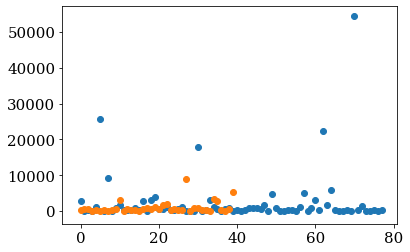

In [393]:
plt.scatter(np.arange(len(c_t)), c_t)
plt.scatter(np.arange(len(c_f)), c_f)

In [576]:

# plt.figure(figsize=(4,4))
# cut = -1
# arr = c_t[:cut]
# plt.plot(np.sort(arr), np.linspace(0, 1, len(arr), endpoint=False), color='yellow', label='Inf(T)', linewidth=2)
# arr = c_f[:cut-1]
# plt.plot(np.sort(arr), np.linspace(0, 1, len(arr), endpoint=False), color='indianred', label='Inf(F)', linewidth=2)
# plt.legend()
# plt.tight_layout()
# plt.show()
# import seaborn as sns
# sns.distplot(c_t)
# sns.distplot(c_f)
# plt.hist(c_t, normed=True, cumulative=False, label='Inf(T)',
#          histtype='step', alpha=1.0, color='blue', linewidth=2)
# plt.hist(c_f, normed=True, cumulative=False, label='Inf(F)',
#          histtype='step', alpha=1.0, color='indianred', linewidth=2)
# plt.legend()

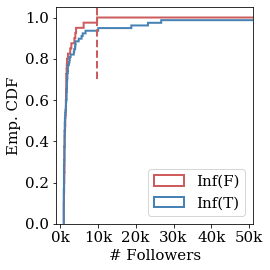

In [571]:
plt.figure(figsize=(4,4))
data = list(c_t) + list(c_f)
binwidth=50
bins=np.arange(min(data), max(data) + binwidth, binwidth)
# print(bins)

plt.hist(c_f*1.0, bins=bins, normed=True, cumulative=True, label='Inf(F)',
         histtype='step', alpha=1.0, color='indianred', linewidth=2)

plt.hist(c_t*1.0, bins=bins, normed=True, cumulative=True, label='Inf(T)',
         histtype='step', alpha=1.0, color='steelblue', linewidth=2)

# x = [8800] # *4
# y = [1.0] # [0.8, 0.9, 1.0, 1.05]
# plt.plot(x, y, marker='*', markersize=10, color='black', linewidth=0, linestyle='')

x = [8800]*4
y = [0.7, 0.9, 1.0, 1.05]
plt.plot(x, y, color='indianred', linewidth=2, linestyle='--')

plt.xlim(-2000, 50000)
plt.ylim(0, 1.05)
plt.xticks(np.arange(-1000, 50000, 10000), labels=['0k', '10k', '20k', '30k', '40k', '50k'])
plt.legend(loc='lower right')
plt.ylabel('Emp. CDF')
plt.xlabel('# Followers')
plt.tight_layout()
plt.savefig('inf_followers.pdf')

# virality

In [87]:
# cascade size distribution (ecdf)
# cascade size of fake infl users
# cascade size of true infl users
# cascade size of infl users in general

def get_cassizes(cascades):
    sizes = [len(c) for c in cascades]
    return np.array(sizes)

cascades = read_cascades_file('../data/kwon/cascades.txt')
sizes = get_cassizes(cascades)
sizes

array([  125,   604,   225,   131,    22,   505,   628,   846,    10,
         372,   718,   240,   469,  1079,   477,    24,   129,  1006,
          42,  1154,    13,   372,  1439,   342,    63,   123,   507,
         517,   369,  3503,    19, 22653,    41,  1891,    77, 14495,
          14,   102,   282,   145,   151,   916,   767,   116,  2715,
        4820,   113,    51,   222,  9786,   930,    81,  2593,  1838,
       14992,  4041,   120,    59,  3473,   131,    25,   304,   116,
         579,   162,   414,   121,    14,    56,    48,  2511,    47,
         258,   233,  2771,  4807,  1329,   302,    59,    20,   875,
       13458,   633,   315,   112,    39, 25974,    36,   152,  2849,
         103,    17,    15,  2157,   159,  7345,    98,  1872,  3958,
          61,    95,    88,  1012,    61,    53,  3971,   171,  3650,
          54,   142,  4961])

In [89]:

def get_cascades_of_users(cascades, ulist):
    cas_ind = []
    checkset = set(ulist)
    for i, c in enumerate(cascades):
        uset = set(c[:, 0])
        if uset & checkset:
            cas_ind.append(i)
    return cas_ind

def get_cascade_subset(cascades, casind):
    subset = np.array(cascades)[casind]
    return subset

def get_correct_infl(infl, df, cond):
    ind = get_incorrect(df, cond)
    all_ind = np.arange(len(df))
    comp = list(set(all_ind) - set(ind))
    correct = infl[list(comp)]
#     print('comp', comp, len(comp))
#     if cond == 't':
#         print(df.iloc[comp].loc[df['u_f'] > 0])
    # correct = follcount
    return correct

fake_infl = df_f['userid']
true_infl = df_t['userid']
fake_infl = get_correct_infl(fake_infl, df_f, 'f')
true_infl = get_correct_infl(true_infl, df_t, 't')
print(len(fake_infl), len(true_infl))

casind_f = get_cascades_of_users(cascades, fake_infl)
casind_t = get_cascades_of_users(cascades, true_infl)
print(len(casind_f), len(casind_t))

cf = get_cassizes(get_cascade_subset(cascades, casind_f))
ct = get_cassizes(get_cascade_subset(cascades, casind_t))
# print(ct)
# print(cf)

print(min(ct), min(cf), min(sizes))

41 78
42 42
63 25 10


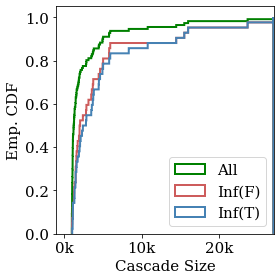

In [90]:
plt.figure(figsize=(4,4))
data = sizes
binwidth=5
bins=np.arange(min(data), max(data) + binwidth, binwidth)
# print(min(data), max(data))
# print(bins)

plt.hist(sizes*1.0, bins=bins, normed=True, cumulative=True, label='All',
         histtype='step', alpha=1.0, color='green', linewidth=2)

plt.hist(cf*1.0, bins=bins, normed=True, cumulative=True, label='Inf(F)',
         histtype='step', alpha=1.0, color='indianred', linewidth=2)

plt.hist(ct*1.0, bins=bins, normed=True, cumulative=True, label='Inf(T)',
         histtype='step', alpha=1.0, color='steelblue', linewidth=2)


plt.xlim(-2000, 26000)
# plt.ylim(0, 1.05)
plt.xticks(np.arange(-1000, 25000, 10000), labels=['0k', '10k', '20k'])
plt.legend(loc='lower right')
plt.ylabel('Emp. CDF')
plt.xlabel('Cascade Size')
plt.tight_layout()
plt.savefig('inf_virality.pdf')

In [92]:
cascades = np.array(read_cascades_file('../data/kwon/cascades.txt'))
labels = np.loadtxt('../data/kwon/labels.txt', dtype=np.int32)
f_label = np.where(labels == 1)[0]
t_label = np.where(labels == 0)[0]
cascades_fake = cascades[f_label]
cascades_true = cascades[t_label]
sizes = get_cassizes(cascades)
sizes_fake = get_cassizes(cascades_fake)
sizes_true = get_cassizes(cascades_true)
print(len(sizes), len(sizes_fake), len(sizes_true))

def minmax(s):
    print(len(s), min(s), max(s), np.mean(s))

minmax(sizes)
minmax(sizes_fake)
minmax(sizes_true)

111 60 51
111 10 25974 1732.882882882883
60 14 25974 1021.2166666666667
51 10 22653 2570.1372549019607


In [96]:

def get_filtered_cascade_subset(cascades, casind, label_ind):
    subset_set = set(casind) & set(label_ind)
    print(subset_set)
    subset = np.array(cascades)[list(subset_set)]
    return subset

fake_infl = df_f['userid']
true_infl = df_t['userid']
fake_infl = get_correct_infl(fake_infl, df_f, 'f')
true_infl = get_correct_infl(true_infl, df_t, 't')
print(len(fake_infl), len(true_infl))

casind_f = get_cascades_of_users(cascades, fake_infl)
casind_t = get_cascades_of_users(cascades, true_infl)
print(len(casind_f), len(casind_t))

sizes_fake_inff = get_cassizes(get_filtered_cascade_subset(cascades, casind_f, f_label))
sizes_fake_inft = get_cassizes(get_filtered_cascade_subset(cascades, casind_t, f_label))

sizes_true_inff = get_cassizes(get_filtered_cascade_subset(cascades, casind_f, t_label))
sizes_true_inft = get_cassizes(get_filtered_cascade_subset(cascades, casind_t, t_label))

minmax(sizes_fake_inff)
minmax(sizes_fake_inft)
minmax(sizes_true_inff)
minmax(sizes_true_inft)

41 78
42 42
{1, 5, 6, 10, 17, 18, 22, 26, 27, 38, 44, 45, 56, 60, 61, 63, 74, 75, 83, 86, 93, 102, 105}
{1, 5, 102, 74, 43, 44, 45, 22, 23, 56, 86, 26}
{3, 13, 21, 31, 33, 35, 39, 42, 50, 52, 53, 54, 55, 58, 70, 81, 99, 107, 110}
{13, 14, 19, 21, 24, 28, 29, 31, 33, 35, 39, 42, 49, 50, 52, 53, 54, 55, 58, 64, 70, 76, 81, 82, 89, 94, 95, 98, 107, 110}
23 25 25974 2426.8695652173915
12 116 25974 3410.4166666666665
19 61 22653 4949.526315789473
30 63 22653 4187.866666666667


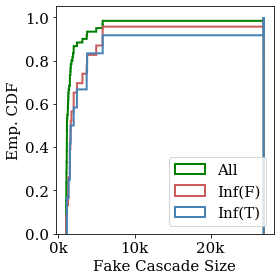

In [98]:
plt.figure(figsize=(4,4))
data = sizes
binwidth=5
bins=np.arange(min(data), max(data) + binwidth, binwidth)
# print(min(data), max(data))
# print(bins)

plt.hist(sizes_fake*1.0, bins=bins, normed=True, cumulative=True, label='All',
         histtype='step', alpha=1.0, color='green', linewidth=2)

plt.hist(sizes_fake_inff*1.0, bins=bins, normed=True, cumulative=True, label='Inf(F)',
         histtype='step', alpha=1.0, color='indianred', linewidth=2)

plt.hist(sizes_fake_inft*1.0, bins=bins, normed=True, cumulative=True, label='Inf(T)',
         histtype='step', alpha=1.0, color='steelblue', linewidth=2)


# plt.xlim(-2000, 26000)
# plt.ylim(0, 1.05)
plt.xticks(np.arange(-1000, 25000, 10000), labels=['0k', '10k', '20k'])
plt.legend(loc='lower right')
plt.ylabel('Emp. CDF')
plt.xlabel('Fake Cascade Size')
plt.tight_layout()
plt.savefig('inf_virality_fake.pdf')

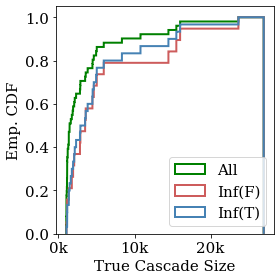

In [99]:
plt.figure(figsize=(4,4))
data = sizes
binwidth=5
bins=np.arange(min(data), max(data) + binwidth, binwidth)
# print(min(data), max(data))
# print(bins)

plt.hist(sizes_true*1.0, bins=bins, normed=True, cumulative=True, label='All',
         histtype='step', alpha=1.0, color='green', linewidth=2)

plt.hist(sizes_true_inff*1.0, bins=bins, normed=True, cumulative=True, label='Inf(F)',
         histtype='step', alpha=1.0, color='indianred', linewidth=2)

plt.hist(sizes_true_inft*1.0, bins=bins, normed=True, cumulative=True, label='Inf(T)',
         histtype='step', alpha=1.0, color='steelblue', linewidth=2)


# plt.xlim(-2000, 26000)
# plt.ylim(0, 1.05)
plt.xticks(np.arange(-1000, 25000, 10000), labels=['0k', '10k', '20k'])
plt.legend(loc='lower right')
plt.ylabel('Emp. CDF')
plt.xlabel('True Cascade Size')
plt.tight_layout()
plt.savefig('inf_virality_true.pdf')

# time to first engagement

In [201]:
def get_time_to_first_eng(cascades, users):
    times = []
    uset = set(users)
    for i, c in enumerate(cascades):
        seenset = set()
        for p, (u, t)  in enumerate(c):
            if u in uset and u not in seenset:
                times.append(p)
                seenset.add(u)
    times = np.array(times) 
    return times

fake_infl = df_f['userid']
true_infl = df_t['userid']
fake_infl = get_correct_infl(fake_infl, df_f, 'f')
true_infl = get_correct_infl(true_infl, df_t, 't')
print(len(fake_infl), len(true_infl))

casind_f = get_cascades_of_users(cascades, fake_infl)
casind_t = get_cascades_of_users(cascades, true_infl)
print(len(casind_f), len(casind_t))

sizes_fake_inff = get_time_to_first_eng(get_filtered_cascade_subset(cascades, casind_f, f_label), fake_infl)
sizes_fake_inft = get_time_to_first_eng(get_filtered_cascade_subset(cascades, casind_t, f_label), true_infl)

sizes_true_inff = get_time_to_first_eng(get_filtered_cascade_subset(cascades, casind_f, t_label), fake_infl)
sizes_true_inft = get_time_to_first_eng(get_filtered_cascade_subset(cascades, casind_t, t_label), true_infl)

# sizes_true_inft = np.array(sizes_true_inft + sizes_fake_inft)
# sizes_fake_inff = np.array(sizes_true_inff + sizes_fake_inff)

minmax(sizes_fake_inff)
minmax(sizes_fake_inft)
minmax(sizes_true_inff)
minmax(sizes_true_inft)

41 78
42 42
{1, 5, 6, 10, 17, 18, 22, 26, 27, 38, 44, 45, 56, 60, 61, 63, 74, 75, 83, 86, 93, 102, 105}
{1, 5, 102, 74, 43, 44, 45, 22, 23, 56, 86, 26}
{3, 13, 21, 31, 33, 35, 39, 42, 50, 52, 53, 54, 55, 58, 70, 81, 99, 107, 110}
{13, 14, 19, 21, 24, 28, 29, 31, 33, 35, 39, 42, 49, 50, 52, 53, 54, 55, 58, 64, 70, 76, 81, 82, 89, 94, 95, 98, 107, 110}
56 0 11935 1550.982142857143
27 54 21889 2193.5925925925926
42 1 13477 2616.6428571428573
124 0 22350 3862.1129032258063


0 11935


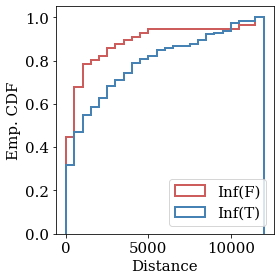

In [202]:
# print(sizes_fake_inff)

plt.figure(figsize=(4,4))
data = sizes_fake_inff
binwidth=500
bins = np.arange(min(data), max(data) + binwidth, binwidth)
print(min(data), max(data))

plt.hist(sizes_fake_inff*1.0, bins=bins, normed=True, cumulative=True, label='Inf(F)',
         histtype='step', alpha=1.0, color='indianred', linewidth=2)

# plt.hist(sizes_fake_inft*1.0, bins=bins, normed=True, cumulative=True, label='Fake (Inf(T))',
#          histtype='step', alpha=1.0, color='pink', linewidth=2)



# plt.hist(sizes_true_inff*1.0, bins=bins, normed=True, cumulative=True, label='True (Inf(F))',
#          histtype='step', alpha=1.0, color='steelblue', linewidth=2)

plt.hist(sizes_true_inft*1.0, bins=bins, normed=True, cumulative=True, label='Inf(T)',
         histtype='step', alpha=1.0, color='steelblue', linewidth=2)


# plt.xlim(-2000, 26000)
# plt.ylim(0, 1.05)
# plt.xticks(np.arange(-1000, 25000, 10000), labels=['0k', '10k', '20k'])
plt.legend(loc='lower right')
plt.ylabel('Emp. CDF')
plt.xlabel('Distance')
# plt.xlabel('Time Lag (s)')
# plt.title('Fake')
plt.tight_layout()
plt.savefig('inf_distance.pdf')

In [203]:
def get_time_to_first_eng(cascades, users):
    times = []
    uset = set(users)
    for i, c in enumerate(cascades):
        seenset = set()
        for p, (u, t)  in enumerate(c):
            if u in uset and u not in seenset:
                times.append(t)
                seenset.add(u)
    times = np.array(times) 
    return times

fake_infl = df_f['userid']
true_infl = df_t['userid']
fake_infl = get_correct_infl(fake_infl, df_f, 'f')
true_infl = get_correct_infl(true_infl, df_t, 't')
print(len(fake_infl), len(true_infl))

casind_f = get_cascades_of_users(cascades, fake_infl)
casind_t = get_cascades_of_users(cascades, true_infl)
print(len(casind_f), len(casind_t))

sizes_fake_inff = get_time_to_first_eng(get_filtered_cascade_subset(cascades, casind_f, f_label), fake_infl)
sizes_fake_inft = get_time_to_first_eng(get_filtered_cascade_subset(cascades, casind_t, f_label), true_infl)

sizes_true_inff = get_time_to_first_eng(get_filtered_cascade_subset(cascades, casind_f, t_label), fake_infl)
sizes_true_inft = get_time_to_first_eng(get_filtered_cascade_subset(cascades, casind_t, t_label), true_infl)

minmax(sizes_fake_inff)
minmax(sizes_fake_inft)
minmax(sizes_true_inff)
minmax(sizes_true_inft)

41 78
42 42
{1, 5, 6, 10, 17, 18, 22, 26, 27, 38, 44, 45, 56, 60, 61, 63, 74, 75, 83, 86, 93, 102, 105}
{1, 5, 102, 74, 43, 44, 45, 22, 23, 56, 86, 26}
{3, 13, 21, 31, 33, 35, 39, 42, 50, 52, 53, 54, 55, 58, 70, 81, 99, 107, 110}
{13, 14, 19, 21, 24, 28, 29, 31, 33, 35, 39, 42, 49, 50, 52, 53, 54, 55, 58, 64, 70, 76, 81, 82, 89, 94, 95, 98, 107, 110}
56 0.0 66023954.0 22110353.5
27 254866.0 62368237.0 24498038.0
42 100.0 62912904.0 9101348.714285715
124 0.0 69281723.0 11969959.959677419


0.0 66023954.0


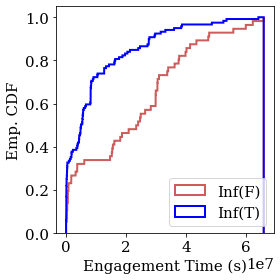

In [204]:
# print(sizes_fake_inff)

plt.figure(figsize=(4,4))
data = sizes_fake_inff
binwidth=500
bins = np.arange(min(data), max(data) + binwidth, binwidth)
print(min(data), max(data))

plt.hist(sizes_fake_inff*1.0, bins=bins, normed=True, cumulative=True, label='Inf(F)',
         histtype='step', alpha=1.0, color='indianred', linewidth=2)

# plt.hist(sizes_fake_inft*1.0, bins=bins, normed=True, cumulative=True, label='Fake (Inf(T))',
#          histtype='step', alpha=1.0, color='pink', linewidth=2)



# plt.hist(sizes_true_inff*1.0, bins=bins, normed=True, cumulative=True, label='True (Inf(F))',
#          histtype='step', alpha=1.0, color='steelblue', linewidth=2)

plt.hist(sizes_true_inft*1.0, bins=bins, normed=True, cumulative=True, label='Inf(T)',
         histtype='step', alpha=1.0, color='blue', linewidth=2)


# plt.xlim(-2000, 26000)
# plt.ylim(0, 1.05)
# plt.xticks(np.arange(-1000, 25000, 10000), labels=['0k', '10k', '20k'])
plt.legend(loc='lower right')
plt.ylabel('Emp. CDF')
plt.xlabel('Engagement Time (s)')
# plt.title('Fake')
plt.tight_layout()
# plt.savefig('inf_virality_fake.pdf')

# num of repeated engagements

In [215]:
from collections import defaultdict

def get_num_repeat_engs(cascades, users):
    times = []
    uset = set(users)
    for i, c in enumerate(cascades):
        seen = defaultdict(int)
        seen_prevt = defaultdict(float)
        seen_rollingt = defaultdict(float)
        for p, (u, t)  in enumerate(c):
            if u in uset:
                seen[u] += 1
                seen_rollingt[u] += t - seen_prevt[u]
                seen_prevt[u] = t
        a = list(seen_rollingt.values())
        b = list(seen.values())
        times += list(np.array(a)/np.array(b))
    times = np.array(times) 
    return times

fake_infl = df_f['userid']
true_infl = df_t['userid']
fake_infl = get_correct_infl(fake_infl, df_f, 'f')
true_infl = get_correct_infl(true_infl, df_t, 't')
print(len(fake_infl), len(true_infl))

casind_f = get_cascades_of_users(cascades, fake_infl)
casind_t = get_cascades_of_users(cascades, true_infl)
print(len(casind_f), len(casind_t))

sizes_fake_inff = get_num_repeat_engs(get_filtered_cascade_subset(cascades, casind_f, f_label), fake_infl)
sizes_fake_inft = get_num_repeat_engs(get_filtered_cascade_subset(cascades, casind_t, f_label), true_infl)

sizes_true_inff = get_num_repeat_engs(get_filtered_cascade_subset(cascades, casind_f, t_label), fake_infl)
sizes_true_inft = get_num_repeat_engs(get_filtered_cascade_subset(cascades, casind_t, t_label), true_infl)

# sizes_true_inft = np.array(sizes_true_inft + sizes_fake_inft)
# sizes_fake_inff = np.array(sizes_true_inff + sizes_fake_inff)

minmax(sizes_fake_inff)
minmax(sizes_fake_inft)
minmax(sizes_true_inff)
minmax(sizes_true_inft)

41 78
42 42
{1, 5, 6, 10, 17, 18, 22, 26, 27, 38, 44, 45, 56, 60, 61, 63, 74, 75, 83, 86, 93, 102, 105}
{1, 5, 102, 74, 43, 44, 45, 22, 23, 56, 86, 26}
{3, 13, 21, 31, 33, 35, 39, 42, 50, 52, 53, 54, 55, 58, 70, 81, 99, 107, 110}
{13, 14, 19, 21, 24, 28, 29, 31, 33, 35, 39, 42, 49, 50, 52, 53, 54, 55, 58, 64, 70, 76, 81, 82, 89, 94, 95, 98, 107, 110}
56 1690.0 62368652.0 9090046.215757659
27 342755.0 62368237.0 21245395.435185187
42 1730.0 62912904.0 6351636.041596638
124 4767.490566037736 69281723.0 6291546.923346035


1690.0 62368652.0


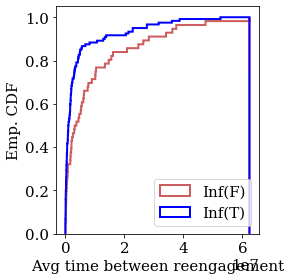

In [218]:
# print(sizes_fake_inff)

plt.figure(figsize=(4,4))
data = sizes_fake_inff
binwidth=5000
bins = np.arange(min(data), max(data) + binwidth, binwidth)
print(min(data), max(data))

plt.hist(sizes_fake_inff*1.0, bins=bins, normed=True, cumulative=True, label='Inf(F)',
         histtype='step', alpha=1.0, color='indianred', linewidth=2)

# plt.hist(sizes_fake_inft*1.0, bins=bins, normed=True, cumulative=True, label='Fake (Inf(T))',
#          histtype='step', alpha=1.0, color='pink', linewidth=2)



# plt.hist(sizes_true_inff*1.0, bins=bins, normed=True, cumulative=True, label='True (Inf(F))',
#          histtype='step', alpha=1.0, color='steelblue', linewidth=2)

plt.hist(sizes_true_inft*1.0, bins=bins, normed=True, cumulative=True, label='Inf(T)',
         histtype='step', alpha=1.0, color='blue', linewidth=2)


# plt.xlim(-2000, 26000)
# plt.ylim(0, 1.05)
# plt.xticks(np.arange(-1000, 25000, 10000), labels=['0k', '10k', '20k'])
plt.legend(loc='lower right')
plt.ylabel('Emp. CDF')
plt.xlabel('Avg time between reengagement')
# plt.title('Fake')
plt.tight_layout()
# plt.savefig('inf_virality_fake.pdf')

# false positives and negatives

In [75]:

def get_incorrect(df, cond):
    ind = []
    for i, row in df.iterrows():
        ut = row['u_t']
        uf = row['u_f']
        if cond == 'f' and uf == 0:
            ind.append(i)
        if cond == 't' and ut == 0:
            ind.append(i)
    # print(ind)
    return ind
        

def get_acc_infl(df_f, df_t):
    acc = []
    p_t = []
    p_f = []

    for i in np.arange(0, 101, 10):
        m_f = 1.0 * len(get_incorrect(df_f[:i], 'f'))
        m_t = 1.0 * len(get_incorrect(df_t[:i], 't'))
        p_f.append(1 - m_f/i)
        p_t.append(1 - m_t/i)
        acc.append(1 - (m_f + m_t)/(2*i))
    return acc, p_t, p_f
    

[]
[]
[0, 1, 2, 5, 6, 9]
[7]
[0, 1, 2, 5, 6, 9, 11, 12, 13, 14, 15, 19]
[7, 13, 16, 19]
[0, 1, 2, 5, 6, 9, 11, 12, 13, 14, 15, 19, 20, 21, 24, 25, 27, 28, 29]
[7, 13, 16, 19, 21, 22, 26, 28]
[0, 1, 2, 5, 6, 9, 11, 12, 13, 14, 15, 19, 20, 21, 24, 25, 27, 28, 29, 30, 31, 32, 34, 36, 39]
[7, 13, 16, 19, 21, 22, 26, 28]
[0, 1, 2, 5, 6, 9, 11, 12, 13, 14, 15, 19, 20, 21, 24, 25, 27, 28, 29, 30, 31, 32, 34, 36, 39, 40, 42, 43, 45, 48, 49]
[7, 13, 16, 19, 21, 22, 26, 28, 46, 48]
[0, 1, 2, 5, 6, 9, 11, 12, 13, 14, 15, 19, 20, 21, 24, 25, 27, 28, 29, 30, 31, 32, 34, 36, 39, 40, 42, 43, 45, 48, 49, 51, 52, 56, 58, 59]
[7, 13, 16, 19, 21, 22, 26, 28, 46, 48, 57, 59]
[0, 1, 2, 5, 6, 9, 11, 12, 13, 14, 15, 19, 20, 21, 24, 25, 27, 28, 29, 30, 31, 32, 34, 36, 39, 40, 42, 43, 45, 48, 49, 51, 52, 56, 58, 59, 60, 62, 66, 67, 68]
[7, 13, 16, 19, 21, 22, 26, 28, 46, 48, 57, 59, 67, 68]
[0, 1, 2, 5, 6, 9, 11, 12, 13, 14, 15, 19, 20, 21, 24, 25, 27, 28, 29, 30, 31, 32, 34, 36, 39, 40, 42, 43, 45, 48, 49, 51

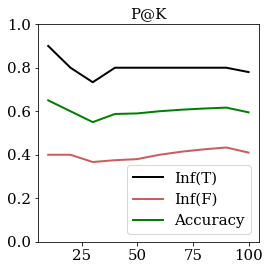

In [572]:
acc, p_t, p_f = get_acc_infl(df_f, df_t)
plt.figure(figsize=(4,4))
plt.plot(np.arange(0, 101, 10), p_t, color='black', label='Inf(T)', linewidth=2)
plt.plot(np.arange(0, 101, 10), p_f, color='indianred', label='Inf(F)', linewidth=2)
plt.plot(np.arange(0, 101, 10), acc, color='green', label='Accuracy', linewidth=2)
plt.legend(loc='lower right')
plt.ylim(0, 1)
plt.title('P@K')
plt.tight_layout()
plt.savefig('precisionK_kwon.pdf')

[]
[]
[1, 6]
[]
[1, 6, 12]
[18]
[1, 6, 12]
[18]
[1, 6, 12]
[18]
[1, 6, 12]
[18]
[1, 6, 12]
[18]
[1, 6, 12, 63]
[18]
[1, 6, 12, 63, 74]
[18, 73]
[1, 6, 12, 63, 74]
[18, 73]
[1, 6, 12, 63, 74]
[18, 73, 97]


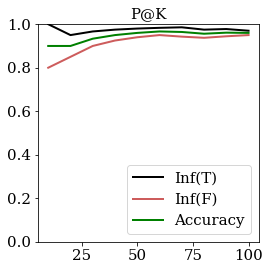

In [573]:
acc, p_t, p_f = get_acc_infl(tma_df_f, tma_df_t)
plt.figure(figsize=(4, 4))
plt.plot(np.arange(0, 101, 10), p_t, color='black', label='Inf(T)', linewidth=2)
plt.plot(np.arange(0, 101, 10), p_f, color='indianred', label='Inf(F)', linewidth=2)
plt.plot(np.arange(0, 101, 10), acc, color='green', label='Accuracy', linewidth=2)
plt.legend(loc='lower right')
plt.ylim(0, 1)
plt.title('P@K')
plt.tight_layout()
plt.savefig('precisionK_tma.pdf')

# Likelihood vs Cascade Size Plot

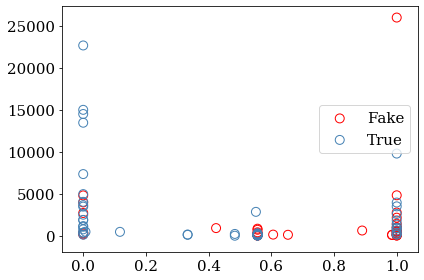

In [273]:
cascades = np.array(read_cascades_file('../data/kwon/cascades.txt'))
labels = np.loadtxt('../data/kwon/labels.txt')
ll = np.loadtxt('../output/all_kwon/kwon/resp.txt')
casnames = np.loadtxt('../data/kwon/cascade_names.txt', dtype=np.str)
ll_fake = ll[:, 0]
filtered = np.array(ll[:, 3], dtype=np.int32)
subset = cascades[filtered]
target = ll[:, 2]
subset_sizes = np.array([len(s) for s in subset])
fake_ind = np.where(target == 1)[0]
true_ind = np.where(target == 0)[0]

plt.scatter(ll_fake[fake_ind], subset_sizes[fake_ind], s=80, facecolors='none', edgecolors='red', label='Fake')
plt.scatter(ll_fake[true_ind], subset_sizes[true_ind], s=80, facecolors='none', edgecolors='steelblue', label='True')
plt.legend()
plt.tight_layout()
plt.savefig('ll_scatter_kwon.pdf')

In [271]:
g = np.where(ll_fake > 0.9)[0]
l = np.where(ll_fake < 1.0)[0]
c = np.array(list(set(g) & set(l)))
print(c)
print(casnames[c])

[ 0  1 68 37 15 16 79 51 85 22 23 61 62]
['R_EricssonFreeLaptop.txt' 'R_ZunePhone.txt' 'R_obamaNationalDay.txt'
 'R_Earwig.txt' 'R_CookCellphone.txt' 'R_ReversePIN.txt'
 'R_CellphoneGasExplosion.txt' 'R_DietCokeBacon.txt'
 'N_BarnesNobleObamaMonkey.txt' 'R_IphoneOLED.txt' 'R_ToothFairy.txt'
 'R_GiantCatfish.txt' 'N_Airliner.txt']


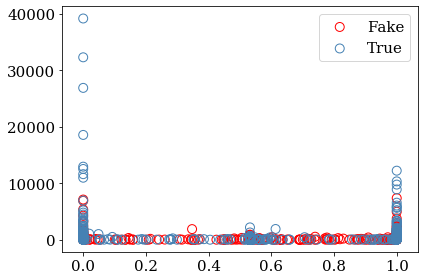

In [274]:
cascades = np.array(read_cascades_file('../data/tma/cascades.txt'))
labels = np.loadtxt('../data/tma/labels.txt')
ll = np.loadtxt('../output/all_tma/tma_E/resp.txt')
ll_fake = ll[:, 0]
filtered = np.array(ll[:, 3], dtype=np.int32)
subset = cascades[filtered]
target = ll[:, 2]
subset_sizes = np.array([len(s) for s in subset])
fake_ind = np.where(target == 1)[0]
true_ind = np.where(target == 0)[0]

plt.scatter(ll_fake[fake_ind], subset_sizes[fake_ind], s=80, facecolors='none', edgecolors='red', label='Fake')
plt.scatter(ll_fake[true_ind], subset_sizes[true_ind], s=80, facecolors='none', edgecolors='steelblue', label='True')
plt.legend()
plt.tight_layout()
plt.savefig('ll_scatter_tma.pdf')